<a href="https://colab.research.google.com/github/nikhildhavale/pythonLearning/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (569, 30)
Target Classes: ['malignant' 'benign']

First 5 rows (Notice the different scales! Area ~1000, Smoothness ~0.1):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030



Data Scaled (Mean=0, Std=1):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness
0     1.097064     -2.073335        1.269934   0.984375         1.568466
1     1.829821     -0.353632        1.685955   1.908708        -0.826962
2     1.579888      0.456187        1.566503   1.558884         0.942210
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553
4     1.750297     -1.151816        1.776573   1.826229         0.280372


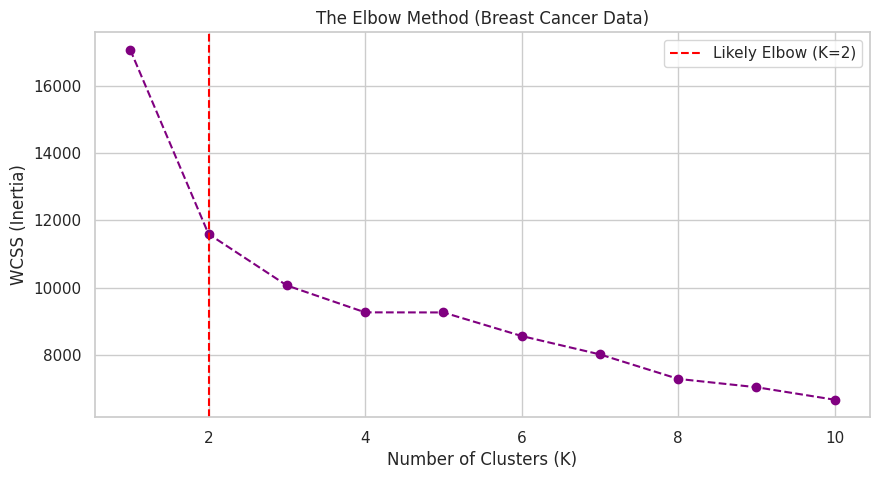


Silhouette Scores:
K=2: 0.3447
K=3: 0.3152
K=4: 0.2742
K=5: 0.1645


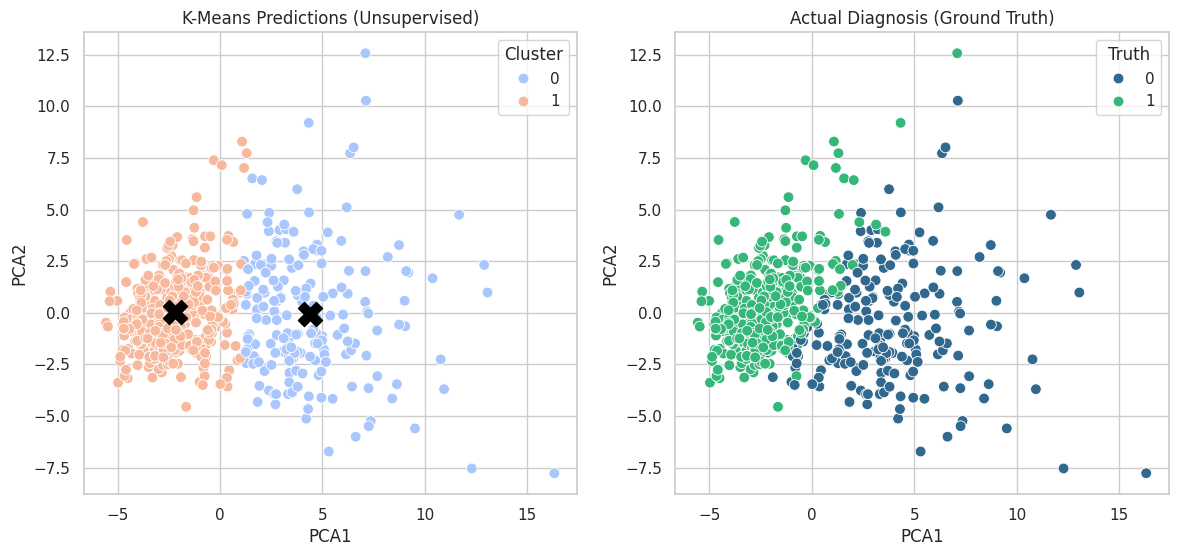


--- RESULTS ---
K-Means Accuracy (after label mapping): 91.21%

Confusion Matrix:
                Pred Malignant  Pred Benign
True Malignant             175           37
True Benign                 13          344
Dataset Shape: (569, 30)
Data Scaled (Mean=0, Std=1). Ready for Density check.
Indices  [[  0  77  25 ... 369 118  24]
 [  1 365   6 ... 282 498 207]
 [  2 535  45 ... 516 280  87]
 ...
 [566 441 100 ...  16 536 237]
 [567 181 393 ...  17 258  45]
 [568 550 425 ...  46 538 333]] Distances  [[0.00000000e+00 4.82994961e+00 4.91106276e+00 ... 7.37140858e+00
  7.43482743e+00 7.51802354e+00]
 [8.42936970e-08 2.28705131e+00 2.53602792e+00 ... 3.78156544e+00
  3.78618530e+00 3.83064462e+00]
 [0.00000000e+00 2.45154124e+00 2.67626057e+00 ... 3.74889986e+00
  3.77097874e+00 3.84184201e+00]
 ...
 [0.00000000e+00 2.55988376e+00 3.00376439e+00 ... 3.82860121e+00
  3.88148830e+00 3.92301452e+00]
 [0.00000000e+00 3.49995904e+00 4.81652818e+00 ... 7.00229007e+00
  7.00366753e+00 7.07180623

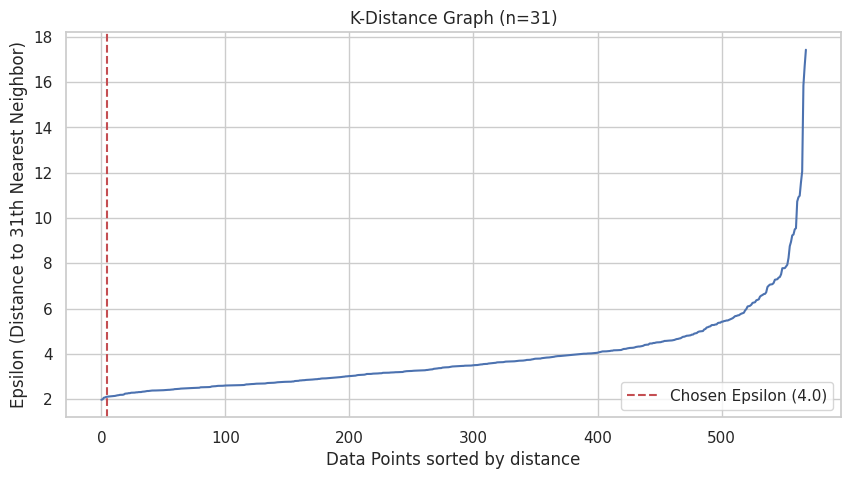

Observation: The curve starts bending sharply between y=2.0 and y=4.0.
We will pick eps=4.0 as a balanced starting point.

Estimated number of clusters: 1
Estimated number of noise points: 13 (Points labeled -1)
Cluster Labels Found: [-1  0]


In [5]:
# ==========================================
# K-MEANS: BREAST CANCER WISCONSIN DATASET
# ==========================================
# Concepts: High-Dimensional Clustering (30 Features), PCA, Mapping Accuracy
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

# Sklearn modules
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

# Configure plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings('ignore')

# ---------------------------------------------------------
# 1. LOAD DATA
# ---------------------------------------------------------
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Store ground truth separately for checking later
# 0 = Malignant (Bad), 1 = Benign (Good)
true_labels = data.target
target_names = data.target_names

print(f"Dataset Shape: {df.shape}")
print(f"Target Classes: {target_names}")
print("\nFirst 5 rows (Notice the different scales! Area ~1000, Smoothness ~0.1):")
display(df.iloc[:, :5].head()) # Displaying first 5 columns only to save space

# ---------------------------------------------------------
# 2. PREPROCESSING (CRITICAL!)
# ---------------------------------------------------------
# With 30 features, if 'Mean Area' is 1000 and 'Smoothness' is 0.08,
# K-Means will ONLY care about Area. We MUST scale.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

print("\nData Scaled (Mean=0, Std=1):")
# Show first 5 columns of scaled data
print(pd.DataFrame(X_scaled, columns=df.columns).iloc[:, :5].head())

# ---------------------------------------------------------
# 3. ELBOW METHOD (Finding K)
# ---------------------------------------------------------
# Even though we KNOW cancer has 2 types, we check the math.

wcss = []
range_n_clusters = range(1, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--', color='purple')
plt.title('The Elbow Method (Breast Cancer Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.axvline(x=2, color='red', linestyle='--', label='Likely Elbow (K=2)')
plt.legend()
plt.show()

# ---------------------------------------------------------
# 4. SILHOUETTE ANALYSIS
# ---------------------------------------------------------
# Checking how distinct the groups are at K=2 vs K=3
print("\nSilhouette Scores:")
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42)
    preds = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    print(f"K={k}: {score:.4f}")

# ---------------------------------------------------------
# 5. TRAINING FINAL MODEL (K=2)
# ---------------------------------------------------------
# We choose K=2 based on the dataset logic (Malignant vs Benign)

final_kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
cluster_labels = final_kmeans.fit_predict(X_scaled)

df['Cluster_ID'] = cluster_labels

# ---------------------------------------------------------
# 6. VISUALIZATION via PCA
# ---------------------------------------------------------
# We have 30 Dimensions. We cannot draw a 30-axis graph.
# We use PCA to squash 30 dimensions down to 2 dominant ones.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create plotting dataframe
plot_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
plot_df['Cluster'] = cluster_labels
plot_df['Truth'] = true_labels

# Get Centroids in PCA space
centroids_pca = pca.transform(final_kmeans.cluster_centers_)

plt.figure(figsize=(14, 6))

# Plot 1: What K-Means Found
plt.subplot(1, 2, 1)
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Cluster', palette='coolwarm', s=60)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], s=300, c='black', marker='X', label='Centroids')
plt.title("K-Means Predictions (Unsupervised)")

# Plot 2: The Truth
plt.subplot(1, 2, 2)
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Truth', palette='viridis', s=60)
plt.title("Actual Diagnosis (Ground Truth)")
plt.show()

# ---------------------------------------------------------
# 7. EVALUATING "ACCURACY" (WITH MAPPING)
# ---------------------------------------------------------
# PROBLEM: K-Means might name 'Benign' as Cluster 0 or Cluster 1 randomly.
# SOLUTION: Map cluster IDs to the most frequent true label.

def map_clusters_to_labels(kmeans_labels, true_labels):
    labels_mapped = np.zeros_like(kmeans_labels)
    for i in np.unique(kmeans_labels):
        mask = (kmeans_labels == i)
        if np.sum(mask) == 0: continue
        # Assign the most common true label in this cluster to the cluster ID
        labels_mapped[mask] = mode(true_labels[mask])[0]
    return labels_mapped

# Perform mapping
mapped_labels = map_clusters_to_labels(cluster_labels, true_labels)

# Calculate Accuracy
acc = accuracy_score(true_labels, mapped_labels)
cm = confusion_matrix(true_labels, mapped_labels)

print("\n--- RESULTS ---")
print(f"K-Means Accuracy (after label mapping): {acc*100:.2f}%")
print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=['True Malignant', 'True Benign'], columns=['Pred Malignant', 'Pred Benign']))

# DBSCAN --- Breast cancer dataset:

# ==========================================
# DBSCAN: BREAST CANCER DATASET
# ==========================================
# Concepts: Density-Based Clustering, K-Distance Graph, Noise Handling
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix

# Configure plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings('ignore')

# ---------------------------------------------------------
# 1. LOAD DATA
# ---------------------------------------------------------
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
true_labels = data.target
target_names = data.target_names

print(f"Dataset Shape: {df.shape}")
# ---------------------------------------------------------
# 2. PREPROCESSING (CRITICAL FOR DBSCAN)
# ---------------------------------------------------------
# DBSCAN is entirely based on 'Distance'. If we don't scale,
# variables with large values (Area ~1000) will break the density math.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

print("Data Scaled (Mean=0, Std=1). Ready for Density check.")

# ---------------------------------------------------------
# 3. TUNING: FINDING 'EPSILON' (The K-Distance Graph)
# ---------------------------------------------------------
# We use n=3 because we plan to use min_samples=5 in the model.
# This graph tells us: "How far do I have to travel to find 3 neighbors?"

n = 31  # Corresponds to min_samples
neighbors = NearestNeighbors(n_neighbors=n)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

print("Indices ",indices, "Distances ",distances)

# Sort distance values by ascending value and plot
distances = np.sort(distances[:, n-1], axis=0)

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title(f'K-Distance Graph (n={n})')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'Epsilon (Distance to {n}th Nearest Neighbor)')
plt.grid(True)
plt.axvline(x=4.5, color='r', linestyle='--', label='Chosen Epsilon (4.0)')
plt.legend()
plt.show()

print("Observation: The curve starts bending sharply between y=2.0 and y=4.0.")
print("We will pick eps=4.0 as a balanced starting point.")

# ---------------------------------------------------------
# 4. TRAINING DBSCAN
# ---------------------------------------------------------
# eps=4.0: Chosen from the Elbow graph above.
# min_samples=5: Chosen because the dataset is small (<1000 rows).

dbscan = DBSCAN(eps=6, min_samples=31)
cluster_labels = dbscan.fit_predict(X_scaled)

# IMPORTANT: DBSCAN labels Noise as -1.
df['Cluster_ID'] = cluster_labels

# Check how many clusters we found
unique_labels = np.unique(cluster_labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"\nEstimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise} (Points labeled -1)")
print(f"Cluster Labels Found: {unique_labels}")